20067571 - Nguyễn Dương Thanh Dự

Bài 1

1. Tiền xử lý dữ liệu với Beautiful Soup, re,...

In [5]:
import requests
from bs4 import BeautifulSoup
import json
# Danh sách các class
class_list = ['bat-dong-san', 'goc-nhin', 'the-gioi', 'phap-luat', 'giao-duc']

In [9]:


# URL cơ sở
base_url = 'https://vnexpress.net/'

# Hàm lấy nội dung bài báo từ một liên kết cụ thể
def get_article_content(url):
    visited_texts = set()  # Set để tránh bị duplicate nội dung
    content = ''
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p', class_='Normal')
    
    for paragraph in paragraphs:
        text = paragraph.text.strip()
        if text not in visited_texts:  # Kiểm tra xem nội dung đã được lấy trước đó chưa
            content += text + '\n'
            visited_texts.add(text)  # Thêm vào danh sách nếu chưa
    if len(content) < 1000:
        return  None

    return content


# Hàm lấy bài báo từ một class
def get_articles(class_name):
    url = f'{base_url}{class_name}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('h3', class_='title-news')
    article_list = []
    count = 0
    for article in articles:
        #check nếu content ít hơn 1000 kí tự thì bỏ qua

        article_title = article.text.strip()
        article_link = article.find('a')['href']
        print(article_link)  # In ra link để kiểm tra
        article_content = get_article_content(article_link)
        if article_content is None:
            continue

        count += 1


        article_list.append({
            'title': article_title,
            'link': article_link,
            'content': article_content
        })
        if count >= 10:
            break

    return article_list

# Lặp qua danh sách class và lưu vào file txt
for class_name in class_list:
    articles = get_articles(class_name)
    with open(f'data/{class_name}.json', 'w', encoding='utf-8') as file:
        json.dump(articles, file, ensure_ascii=False)


https://vnexpress.net/nha-be-tong-tran-voi-vuon-rau-tren-mai-4651866.html
https://vnexpress.net/gioi-dau-tu-nhat-ban-dat-cuoc-vao-bat-dong-san-van-phong-my-4652056.html
https://vnexpress.net/de-xuat-bo-sung-26-khu-dat-xay-nha-xa-hoi-tai-tp-hcm-4652116.html
https://vnexpress.net/du-an-100-ty-usd-cua-ong-lon-dia-oc-trung-quoc-bo-hoang-4651855.html
https://vnexpress.net/nha-khung-thep-172-m2-lap-ghep-trong-13-ngay-4651636.html
https://vnexpress.net/co-nen-trat-tuong-2-lop-khi-xay-nha-4651893.html
https://vnexpress.net/loat-ha-tang-duoc-ky-vong-thuc-day-bat-dong-san-dong-ha-noi-4651722.html
https://vnexpress.net/net-doc-dao-tai-nhung-hoa-vien-nghia-trang-4650970.html
https://vnexpress.net/kinh-te-sydney-thiet-hai-10-ty-usd-moi-nam-vi-gia-nha-dat-do-4651500.html
https://vnexpress.net/von-2-3-ty-dong-dau-tu-dat-nen-du-an-hay-dat-tho-cu-4651286.html
https://vnexpress.net/ngoi-nha-thiet-ke-so-le-4651194.html
https://vnexpress.net/cuu-nguoi-dot-quy-4652113.html
https://vnexpress.net/lam-viec-vo

2. Tách từ (Tokenize) sử dụng thư viện pyvi hay underthesea

In [10]:
#load data from json file and give label
import os

# Danh sách các class
label_name = {
    'bat-dong-san': "Bất động sản",
    'goc-nhin': "Góc nhìn",
    'the-gioi': "Thế giới",
    'phap-luat': "Pháp luật",
    'giao-duc': "Giáo dục"
}

data = []
label = []

for file_name in class_list:
    json_file = open(f'data/{file_name}.json', 'r', encoding='utf-8')
    json_data = json.load(json_file)
    for article in json_data:
        data.append(article['content'])
        label.append(label_name[file_name])
#map data and label
import pandas as pd
df = pd.DataFrame({'data': data, 'label': label})
df



,data,label
0,"Ngôi nhà phố có quy mô 3 tầng, diện tích xây d...",Bất động sản
1,"Vào tháng 6, Mori Trust, một nhà phát triển bấ...",Bất động sản
2,Sở Xây dựng TP HCM cho biết UBND TP Thủ Đức và...,Bất động sản
3,"Ở mũi phía Nam của bán đảo Malaysia, ngay gần ...",Bất động sản
4,"Công trình có diện tích xây dựng 172 m2, nằm t...",Bất động sản
5,Theo quy hoạch Thủ đô Hà Nội tới năm 2030 và t...,Bất động sản
6,Được mệnh danh là nơi hội tụ tinh hoa kiến trú...,Bất động sản
7,Theo báo cáo nghiên cứu của Ủy ban cố vấn Sydn...,Bất động sản
8,"Vợ chồng tôi đều làm kinh doanh nhỏ ở TP HCM, ...",Bất động sản
9,"Ngôi nhà 4 tầng rộng 250 m2, nằm tại Giang Tô ...",Bất động sản


In [11]:
import underthesea as uts

In [46]:
#lower data word
df['data'] = df['data'].apply(lambda x: x.lower())

In [47]:
df['word_tokenizer'] = df['data'].apply(lambda x: uts.word_tokenize(x,format='text'))
df

,data,label,word_tokenizer
0,"ngôi nhà phố có quy mô 3 tầng, diện tích xây d...",Bất động sản,"ngôi nhà phố có quy_mô 3 tầng , diện_tích xây_..."
1,"vào tháng 6, mori trust, một nhà phát triển bấ...",Bất động sản,"vào tháng 6 , mori_trust , một nhà phát_triển ..."
2,sở xây dựng tp hcm cho biết ubnd tp thủ đức và...,Bất động sản,sở xây_dựng tp hcm cho biết ubnd tp thủ_đức và...
3,"ở mũi phía nam của bán đảo malaysia, ngay gần ...",Bất động sản,"ở mũi phía nam của bán_đảo malaysia , ngay gần..."
4,"công trình có diện tích xây dựng 172 m2, nằm t...",Bất động sản,"công_trình có diện_tích xây_dựng 172 m2 , nằm ..."
5,theo quy hoạch thủ đô hà nội tới năm 2030 và t...,Bất động sản,theo quy_hoạch thủ_đô hà_nội tới năm 2030 và t...
6,được mệnh danh là nơi hội tụ tinh hoa kiến trú...,Bất động sản,được mệnh_danh là nơi hội_tụ_tinh_hoa kiến_trú...
7,theo báo cáo nghiên cứu của ủy ban cố vấn sydn...,Bất động sản,theo báo_cáo nghiên_cứu của ủy_ban cố_vấn sydn...
8,"vợ chồng tôi đều làm kinh doanh nhỏ ở tp hcm, ...",Bất động sản,"vợ_chồng tôi đều làm kinh_doanh nhỏ ở tp hcm ,..."
9,"ngôi nhà 4 tầng rộng 250 m2, nằm tại giang tô ...",Bất động sản,"ngôi nhà 4 tầng rộng 250 m2 , nằm tại giang_tô..."


3. Trích xuất đặc trưng TF-IDF bằng thư viện sklearn

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
data= df['word_tokenizer'].values.tolist()
data

['ngôi nhà phố có quy_mô 3 tầng , diện_tích xây_dựng 120 m2 trên khu đất rộng 240 m2 tại dĩnh_kế ( bắc_giang ) . hướng chính của khu đất là tây_nam , do_đó nhóm kiến_trúc_sư đưa ra phương_án chuyển_dịch công_trình về hướng bắc , tạo khoảng lùi để trồng cây_xanh nhằm cản nắng hướng tây . ngôi nhà có kết_cấu gồm 2 khối chính với bố cục xô_lệch và xây cao dần vào bên trong , giúp giảm bớt cảm_giác nặng_nề . mặt_tiền ngôi nhà có thiết_kế hình_khối đơn_giản , nổi_bật màu tự_nhiên của bê tông_trần , xen_kẽ các lớp cây_xanh ở ban_công , cổng và hàng_rào . theo kiến_trúc_sư , bê_tông trần là vật_liệu phổ_biến trên thế_giới nhưng còn khá mới_mẻ ở việt_nam , ưu_điểm là bền_vững , dễ thích_nghi với khí_hậu nắng_nóng khi kết_hợp với các thảm cây_xanh . ngoài_ra , các thiết_kế đều được tính_toán kỹ_lưỡng để ngôi nhà có thời_gian sử_dụng lâu_dài mà không cần sửa_chữa , thay_đổi . mái nhà được tận_dụng làm_vườn rau , vừa che_mát cho không_gian bên dưới , vừa cung_cấp thêm thực_phẩm sạch cho bữa ăn gi

In [50]:
TfidfVectorizer = TfidfVectorizer()
tf_data= TfidfVectorizer.fit_transform(data)
tf_data

<50x4377 sparse matrix of type '<class 'numpy.float64'>'
	with 13871 stored elements in Compressed Sparse Row format>

4. Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 5-Fold (k-fold)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tf_data, df['label'], test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
cross_valid = cross_val_score(knn, X_train, y_train, cv=5)
print(cross_valid)
print(cross_valid.mean())

[0.75  0.875 0.625 0.75  0.875]
0.775


5. Huấn luyện dữ liệu cho bài toán phân loại văn bản với tỷ lệ dữ liệu 8:2 (8 phần
train, 2 phần test) sử dụng đặc trưng TF-IDF và 2 giải thuật Bayes, SVM.

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred_gnb = gnb.predict(X_test.toarray())
print(accuracy_score(y_test, y_pred_gnb))

0.6


In [55]:
svc = SVC()
svc.fit(X_train.toarray(), y_train)
y_pred_svc = svc.predict(X_test.toarray())
print(accuracy_score(y_test, y_pred_svc))


0.5


6,7,8. Tính độ đo F1 score, Acc, Confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [58]:
f1_score_gnb = f1_score(y_test, y_pred_gnb, average='weighted')
f1_score_svc = f1_score(y_test, y_pred_svc, average='weighted')
print('F1 score GaussianNB: {}'.format(f1_score_gnb))
print('F1 score SVC: {}'.format(f1_score_svc))

F1 score GaussianNB: 0.6
F1 score SVC: 0.55


In [59]:
confusion_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print('Confusion matrix GaussianNB: \n{}'.format(confusion_matrix_gnb))
print('Confusion matrix SVC: \n{}'.format(confusion_matrix_svc))

Confusion matrix GaussianNB: 
[[0 0 0 0 0]
 [0 2 0 0 0]
 [1 0 2 0 0]
 [2 0 1 0 0]
 [0 0 0 0 2]]
Confusion matrix SVC: 
[[0 0 0 0 0]
 [0 2 0 0 0]
 [2 0 1 0 0]
 [3 0 0 0 0]
 [0 0 0 0 2]]


In [60]:
print('Accuracy GaussianNB: {}'.format(accuracy_score(y_test, y_pred_gnb)))
print('Accuracy SVC: {}'.format(accuracy_score(y_test, y_pred_svc)))

Accuracy GaussianNB: 0.6
Accuracy SVC: 0.5


9. So sánh kết quả các độ đo 6,7,8 với 2 giải thuật học máy ở trên

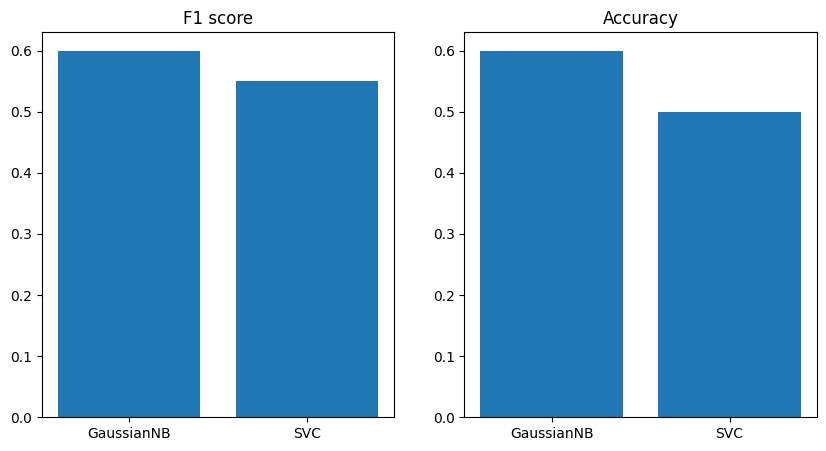

In [64]:
#plot a visualize to compare acc, f1 score and confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('F1 score')
plt.bar(['GaussianNB', 'SVC'], [f1_score_gnb, f1_score_svc])
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.bar(['GaussianNB', 'SVC'], [accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_svc)])

plt.show()


<Axes: title={'center': 'SVC'}>

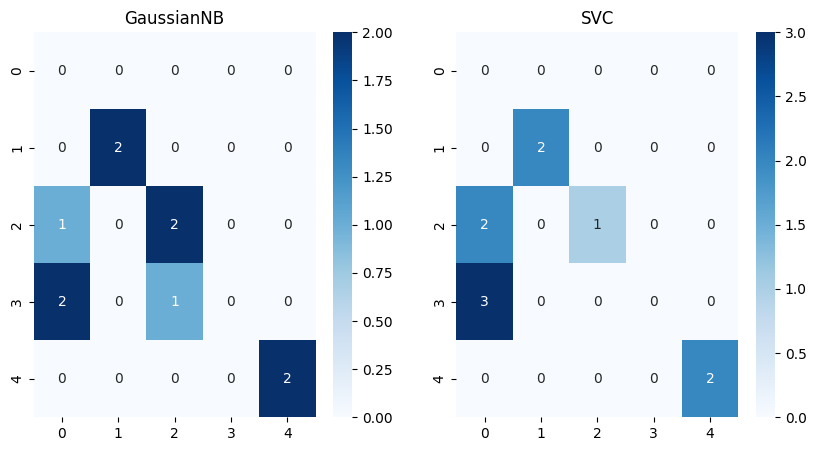

In [65]:
#compare confusion matrix
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('GaussianNB')
sns.heatmap(confusion_matrix_gnb, annot=True, cmap='Blues')
plt.subplot(1, 2, 2)
plt.title('SVC')
sns.heatmap(confusion_matrix_svc, annot=True, cmap='Blues')

10. Lưu model với giải thuật đạt kết quả tốt nhất

In [67]:
import pickle
#save gnb model
pickle.dump(gnb, open('gnb_model.pkl', 'wb'))
pickle.dump(TfidfVectorizer, open('tfidf.pkl', 'wb'))

11. Application

https://nlp-week5-thanhdu.streamlit.app/

## Bài 2

In [77]:
from sklearn.feature_extraction.text import HashingVectorizer 
data_ = [ 
    ' Hôm_nay tôi đi_học',     
    ' Hôm_nay tôi đi_học ở trường',     
    ' Hôm_nay tôi nghỉ ở nhà',    
    ' Hôm_nay tôi có đi_học không?', 
] 
vectorizer = HashingVectorizer(n_features=2**4) 
X = vectorizer.fit_transform(data_) 
print(X.shape)
print(X.toarray())

(4, 16)
[[ 0.         -0.57735027  0.         -0.57735027 -0.57735027  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.5         0.         -0.5        -0.5         0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.5         0.        ]
 [ 0.          0.          0.         -0.70710678  0.70710678  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.4472136   0.         -0.4472136  -0.4472136   0.
   0.          0.          0.          0.4472136   0.          0.
   0.4472136   0.          0.          0.        ]]


Mỗi dòng đại diện cho một câu trong dữ liệu đầu vào (data), và mỗi cột đại diện cho một trong 16 feature được tạo ra bởi HashingVectorizer (vì n_features=2**4).

Dòng 1: 'Hôm_nay tôi đi_học'

Feature 2, 4, 5 mang giá trị xấp xỉ -0.57735027 (khoảng -1/√3), đại diện cho các từ "tôi", "đi_học", "hôm_nay" (được chuyển thành các hash tương ứng).
Các feature còn lại đều mang giá trị 0.

Dòng 2: 'Hôm_nay tôi đi_học ở trường'

Feature 2, 4, 5 mang giá trị xấp xỉ -0.5, đại diện cho các từ "tôi", "đi_học", "hôm_nay".

Feature 14 mang giá trị 0.5, đại diện cho từ "trường".

Các feature còn lại đều mang giá trị 0.

Dòng 3: 'Hôm_nay tôi nghỉ ở nhà'

Feature 3 mang giá trị xấp xỉ -0.70710678 (khoảng -1/√2), đại diện cho từ "nghỉ".

Feature 4 mang giá trị xấp xỉ 0.70710678 (khoảng 1/√2), đại diện cho từ "nhà".

Các feature còn lại đều mang giá trị 0.

Dòng 4: 'Hôm_nay tôi có đi_học không?'

Feature 2, 4 mang giá trị xấp xỉ -0.4472136 (khoảng -1/√5), đại diện cho các từ "tôi", "đi_học".

Feature 10 mang giá trị 0.4472136 (khoảng 1/√5), đại diện cho từ "có".

Feature 13 mang giá trị 0.4472136 (khoảng 1/√5), đại diện cho từ "không".

Các feature còn lại đều mang giá trị 0.


Bài 3:

Sử dụng HashVectorizer thay cho đặc trưng TF-IDF ở bài 1

In [71]:
from sklearn.feature_extraction.text import HashingVectorizer

In [79]:
hash_vector = HashingVectorizer()
hash_data = hash_vector.fit_transform(data)
print(hash_data.shape)

(50, 1048576)


In [80]:

cross_val = cross_val_score(knn, hash_data, df['label'], cv=5)
print(cross_val)
print(cross_val.mean())


[0.7 0.6 0.7 0.7 0.6]
0.6599999999999999


In [81]:
gnb.fit(hash_data.toarray(), df['label'])
y_pred_gnb = gnb.predict(hash_data.toarray())
print(accuracy_score(df['label'], y_pred_gnb))

1.0


In [82]:
svc.fit(hash_data.toarray(), df['label'])
y_pred_svc = svc.predict(hash_data.toarray())
print(accuracy_score(df['label'], y_pred_svc))

1.0
